In [1]:
import pandas as pd
import numpy as np

In [2]:
color_table = pd.read_csv("Files/Colors.txt", sep='\t')
print(color_table)

    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Purple      6
6   Black      7
7   White      8


In [10]:
row = 0
 
with open("Files/FixedWidth.txt", "r") as FW:
    while True:
        Color = FW.read(6)
        if not Color:
            break
        Value = FW.read(5)
        if row == 0:
            color_table2 = pd.DataFrame(
                columns=[Color, Value])
        else:
            color_table2 = color_table2.append(
                [{'Color ': Color, 'Value': Value}],
                ignore_index=True, sort=False)
        row = row + 1

print(color_table2)

   Color   Value
0  Red         1
1  Orange      2
2  Yellow      3
3  Green       4
4  Blue        5
5  Indigo      6
6  Purple      7
7  Black       8
8  White       9
9  Gray       10


In [11]:
color_table3 = pd.read_fwf("Files/FixedWidth2.txt",
                           widths=[6, 5])
print(color_table3)

    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Indigo      6
6  Purple      7
7   Black      8
8   White      9
9    Gray     10


In [18]:
titanic = pd.read_csv("Files/Titanic.csv")
# X = titanic[['age']]
# print(X)
print(titanic.head())

   Unnamed: 0 pclass  survived     sex      age  sibsp  parch
0           1    1st  survived  female  29.0000      0      0
1           2    1st  survived    male   0.9167      1      2
2           3    1st      died  female   2.0000      1      2
3           4    1st      died    male  30.0000      1      2
4           5    1st      died  female  25.0000      1      2


In [24]:
X = titanic[['age']]
print(X.head())
X = titanic[['age']].values
print(X[:5])

       age
0  29.0000
1   0.9167
2   2.0000
3  30.0000
4  25.0000
[[29.        ]
 [ 0.91670001]
 [ 2.        ]
 [30.        ]
 [25.        ]]


In [26]:
color_table4 = pd.read_csv("Files/Colors.csv")
print("Original types:\n", color_table4.dtypes, "\n")
 
for col in color_table4.columns:
    col_split = col.split('.')
    color_table4 = color_table4.rename(
        columns={col: col_split[0]})
    color_table4 = color_table4.astype(
        {col_split[0]: col_split[1]})

print("New types:\n", color_table4.dtypes, "\n")
print(color_table4)

Original types:
 Color.category    object
Value.int16        int64
dtype: object 

New types:
 Color    category
Value       int16
dtype: object 

    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Purple      6
6   Black      7
7   White      8


In [94]:
from lxml import objectify
import pandas as pd
 
xml = objectify.parse(open('Files/XMLData.xml'))
root = xml.getroot()
 
df = pd.DataFrame(columns=('Number', 'String', 'Boolean'))
 
for i in range(0,4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'String', 'Boolean'],
                   [obj[0].text, obj[1].text,
                    obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)

print(df)

  Number  String Boolean
0      1   First    True
1      2  Second   False
2      3   Third    True
3      4  Fourth   False


In [95]:
# some tests and experiments
# now we have different structure
# root has only 2 populations of children
# the goal is to create correct DataFrame with None

my_xml = objectify.parse(open('Files/MyXML.xml'))
root = my_xml.getroot()

children = root.getchildren()
col_names = []

for child in children:
    sub_children = child.getchildren()
    for sub_child in sub_children:
        if sub_child.tag not in col_names:
            col_names.append(sub_child.tag)
            
my_df = pd.DataFrame(columns=col_names)

for child in children:
    row = dict(zip(col_names, [None]*len(col_names)))
    
    for sub_child in child.getchildren():
        row[sub_child.tag] = sub_child.text
    
    row = pd.Series(row)
    my_df = my_df.append(row, ignore_index=True)
    
print(my_df)

  Number  String Boolean OnlyInFirst OnlyInSecond InThirdAndFifth
0      1   First    True        Hey1         None            None
1      2  Second   False        None         Hey2            None
2      3   Third    True        None         None           3and5
3      4  Fourth   False        None         None            None
4      5  Fifths    True        None         None           5and3


In [114]:
from distutils import util
 
xml = objectify.parse(open('Files/XMLData.xml'))
root = xml.getroot()
df = pd.DataFrame(columns=('Number', 'Boolean'))
 
for i in range(0, 4):
    obj = root.getchildren()[i].getchildren()
    if i == 0:
        print(type(obj[0]))
        print(type(obj[0].text))
        print(type(obj[0].pyval))
        print(type(obj[2]))
    row = dict(zip(['Number', 'Boolean'],
                   [obj[0].pyval,
                    bool(util.strtobool(obj[2].text))]))
    row_s = pd.Series(row)
    row_s.name = obj[1].text
    df = df.append(row_s)

print(df)
print(type(df.loc['First']['Number']))
print(type(df.loc['First']['Boolean']))

<class 'lxml.objectify.IntElement'>
<class 'str'>
<class 'int'>
<class 'lxml.objectify.StringElement'>
       Number Boolean
First       1    True
Second      2   False
Third       3    True
Fourth      4   False
<class 'int'>
<class 'bool'>


In [119]:
from lxml import objectify
import pandas as pd
from distutils import util
 
xml = objectify.parse(open('Files/XMLData.xml'))
root = xml.getroot()
 
map_number = map(int, root.xpath('Record/Number'))
map_bool = map(str, root.xpath('Record/Boolean'))
map_bool = map(util.strtobool, map_bool)
map_bool = map(bool, map_bool)
map_string = map(str, root.xpath('Record/String'))
 
data = list(zip(map_number, map_bool))
 
df = pd.DataFrame(data,
                  columns=('Number', 'Boolean'),
                  index = list(map_string))
 
print(df)
print(type(df.loc['First']['Number']))
print(type(df.loc['First']['Boolean']))

        Number  Boolean
First        1     True
Second       2    False
Third        3     True
Fourth       4    False
<class 'numpy.int64'>
<class 'numpy.bool_'>


In [135]:
xls = pd.ExcelFile("Files/Values.xls")
trig_values = xls.parse('Sheet1', index_col=None,
                        na_values=['NA'])
print(trig_values.head())

   Angle (Degrees)      Sine    Cosine   Tangent
0       138.550574  0.661959 -0.749540 -0.883153
1       305.535745 -0.813753  0.581211 -1.400100
2       280.518695 -0.983195  0.182556 -5.385709
3       216.363795 -0.592910 -0.805269  0.736289
4        36.389247  0.593268  0.805005  0.736974


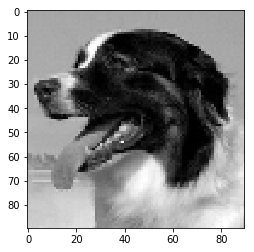

In [143]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm
 
example_file = ("http://upload.wikimedia.org/" +
    "wikipedia/commons/7/7d/Dog_face.png")
image = imread(example_file, as_gray=True)
plt.imshow(image, cmap=cm.gray)

data type: <class 'numpy.ndarray'>, shape: (90, 90)


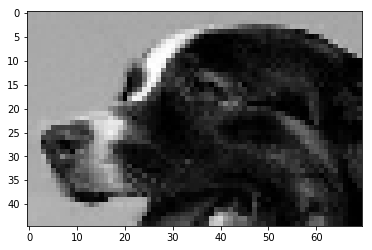

In [149]:
print("data type: %s, shape: %s" %
      (type(image), image.shape))

image2 = image[5:50,0:70]
plt.imshow(image2, cmap=cm.gray)
plt.show()

data type: <class 'numpy.ndarray'>, shape: (30, 30)


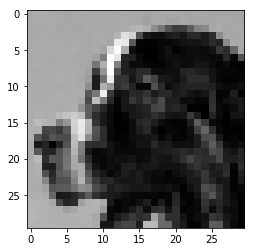

In [157]:
image3 = resize(image2, (30, 30), mode='symmetric', anti_aliasing=False)
plt.imshow(image3, cmap=cm.gray)
print("data type: %s, shape: %s" %
      (type(image3), image3.shape))

In [158]:
image_row = image3.flatten()
print("data type: %s, shape: %s" %
      (type(image_row), image_row.shape))

data type: <class 'numpy.ndarray'>, shape: (900,)
